<B>NAME: Debamala Das Adhikari

</B>

<B>POST-MID-ML LAB</B>





<B>REG.NO:23122111
</B>

REFERENCE:ChatGpt


<i>DATA:Kaggel</i>


<b>AIM: Flight price prediction depend on destination,airline,stops,time,days etc.</b>


<b>USED: Linear Regression Model</b>

IMPORTED LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv("flight_data.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


DATA DESCRIPTION:

airline: The name of the airline operating the flight.
flight: The flight number, which is a unique identifier for the specific flight.
source_city: The city from which the flight departs.
departure_time: The time at which the flight leaves the source city.
stops: The number of stops the flight makes before reaching its destination. This could be direct (0 stops), one stop, or multiple stops.
arrival_time: The time at which the flight arrives at the destination city.
destination_city: The city where the flight is headed.
class: The class of service for the flight, such as economy, business, or first class.
duration: The total duration of the flight from departure to arrival.
days_left: The number of days left until the flight departs from the source city.
price: The cost of a ticket for the flight, typically in the currency relevant to the airline's country or the location where the flight is being booked.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
#Number of flights operating per each airline
data['airline'].value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

vistara is operating most of the routes

In [6]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [8]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
price_by_airline = data.groupby('airline')['price'].mean()
airlines = data['airline'].unique().tolist()


Airline Analysis:



In [10]:
# Create DataFrame with airline names and mean prices
price_by_airline_df = price_by_airline.reset_index()

fig = px.bar(price_by_airline_df, x='airline', y='price', color='airline',
             labels={"airline": "Airline", "price": "Average Ticket Price"},
             width=800, height=400)


fig.show()

Vistara is the most frequently operating airline, followed by Air India, Indigo, GO_FIRST, AirAsia, and SpiceJet.

Which source city is more frequently served:

In [11]:

count_by_source = data.groupby('source_city').count()['airline']
source_city = [i for i,df in data.groupby('source_city')]
px.pie(values = count_by_source,names=source_city,color_discrete_sequence=px.colors.sequential.dense,width=600,height=400)

OUTPUT:Delhi followed by Mumbai and all 

#Which destination city is more frequently served:

In [12]:

count_by_source = data.groupby('destination_city').count()['airline']
destination_city = [i for i,df in data.groupby('destination_city')]
px.pie(values = count_by_source,names=destination_city,color_discrete_sequence=px.colors.sequential.deep,width=600,height=400)

Which Route is the bussiest route

In [13]:

route = data.groupby(['source_city','destination_city']).count()['airline']
route = pd.DataFrame(route)
route = route.reset_index()

Top 5 most busy routes

In [14]:

route.sort_values(by = 'airline',ascending=False).head()

,source_city,destination_city,airline
14,Delhi,Mumbai,15289
27,Mumbai,Delhi,14809
10,Delhi,Bangalore,14012
1,Bangalore,Delhi,13756
4,Bangalore,Mumbai,12939


What are the times at which the cities are operating most of their flights


In [15]:
departure_time = data.groupby('departure_time').count()['airline']
cities = [i for i,df in data.groupby('departure_time')]
px.line(x = cities,y = departure_time,width=900,height=400,labels={'x':"Time of depdarture",'y':'Operating count'},markers=True)

In the morning people are most travelling.



Individual cities and their operating times

In [16]:

cities = [i for i,df in data.groupby('source_city')]
fig = go.Figure()
for i in cities:
    values = data[data['source_city']==i]
    dep_time = [i for i,df in values.groupby('departure_time')]
    values = list(values.groupby('departure_time').count()['airline'].values)
    fig.add_trace(go.Scatter(
    x=dep_time,
    y=values,name = i))
fig.update_layout(
    width=1000,
    height=500,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [17]:
# Compute the mean price for each departure time
price_by_dep_time = data.groupby('departure_time')['price'].mean()

# Create a list of departure times
dep_time = list(price_by_dep_time.index)

# Create a list of corresponding mean prices
values = list(price_by_dep_time.values)


In [18]:
px.bar(x = dep_time,y = values,color = values)
#flights in the latenight are the cheapest


Price Analysis:
The average ticket price varies based on the source and destination cities, with Delhi being the cheapest and Chennai being the most expensive.

In [19]:

price_by_source_city = data.groupby('source_city')['price'].mean()

price_by_destination_city = data.groupby('destination_city')['price'].mean()


fig = make_subplots(rows=1, cols=2, subplot_titles=("Source City", "Destination City"))

fig.add_trace(go.Bar(x=price_by_source_city.index, y=price_by_source_city.values, name="Average Price"),
              row=1, col=1)

fig.add_trace(go.Bar(x=price_by_destination_city.index, y=price_by_destination_city.values, name="Average Price"),
              row=1, col=2)

fig.update_layout(title="Effect of Source and Destination City on Price",
                  xaxis=dict(title="Source/Destination City"),
                  yaxis=dict(title="Average Price"))


fig.show()

Delhi is the cheapest destination/Source to travel for/from and chennai is the most expensive place to reach or to travel from

How does the number of stops effect the price??

In [20]:
data['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [21]:
print(data['stops'].unique())

# Group data by number of stops and compute mean price
price_by_stops = data.groupby('stops')['price'].mean()
fig = make_subplots(rows=1, cols=1)

# Add bar plot for number of stops and mean price
fig.add_trace(go.Bar(x=price_by_stops.index, y=price_by_stops.values, name="Average Price"),
              row=1, col=1)
fig.update_layout(title="Effect of Number of Stops on Price",
                  xaxis=dict(title="Number of Stops"),
                  yaxis=dict(title="Average Price"))
fig.show()

['zero' 'one' 'two_or_more']


Number of days left between departure plays a important role in pricing:

In [22]:

data['price'] = pd.to_numeric(data['price'], errors='coerce')

data.dropna(subset=['price'], inplace=True)

price_mean = data.groupby('days_left')['price'].mean().reset_index()

fig = px.scatter(price_mean, x='days_left', y='price',
                 labels={'days_left': 'Days Left', 'price': 'Average Price'},
                 title='Average Price Variation Based on Days Left')
fig.show()


The average price tends to decrease as the number of days left decreases.

In [23]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Modeling and Prediction:



In [24]:
data.drop(columns=['flight'],inplace=True,axis=1)

Linear regression models have been used to predict ticket prices based on various features, achieving high R^2 scores for both training and testing datasets.

In [25]:
label_encoder = LabelEncoder()
categorical_cols = ['airline','source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


X = data.drop(columns=['price'])
y = data['price']


Label Encoding:

Applied label encoding to the categorical columns such as 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', and 'class'. This process converts the categorical values into numerical values, which is useful for models that can interpret the ordinal relationship between labels.

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [28]:

# Evaluate the model
train_score = linear_reg.score(X_train, y_train)
test_score = linear_reg.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.904621708988755
Testing R^2 score: 0.904554350718816





Model Training and Evaluation:

Trained a Linear Regression model using the encoded data.
The evaluation of the model showed that it achieved a high 𝑅^2.

𝑅^2 score on both the training and testing sets, indicating that the model explains a large proportion of the variance in the target variable ('price').

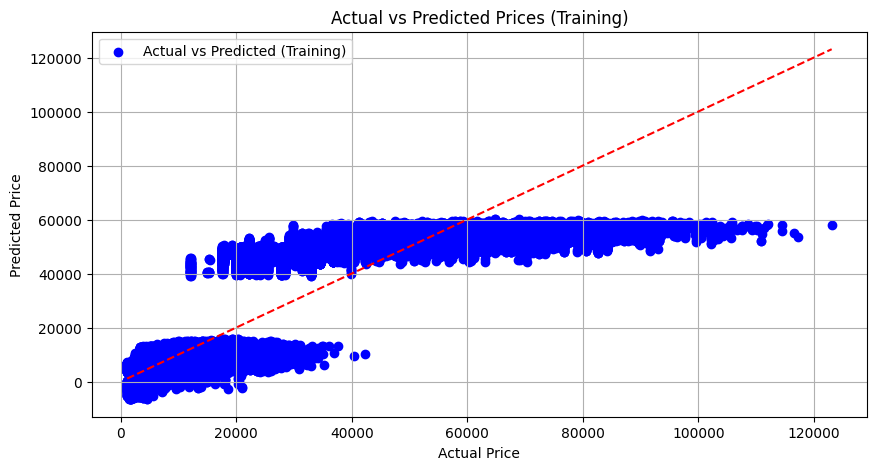

In [29]:
import matplotlib.pyplot as plt

# Generate predictions for training and testing datasets
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Plot actual vs predicted prices for training dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Training)')
plt.legend()
plt.grid(True)
plt.show()

The blue line represents the predicted price and the orange line represents the actual price.


The graph shows that the actual price is generally higher than the predicted price. There are a few exceptions though, for instance around the 20,000 mark on the x-axis, the predicted price is slightly higher than the actual price.  Overall, the trend is for the actual price to be above the predicted price.

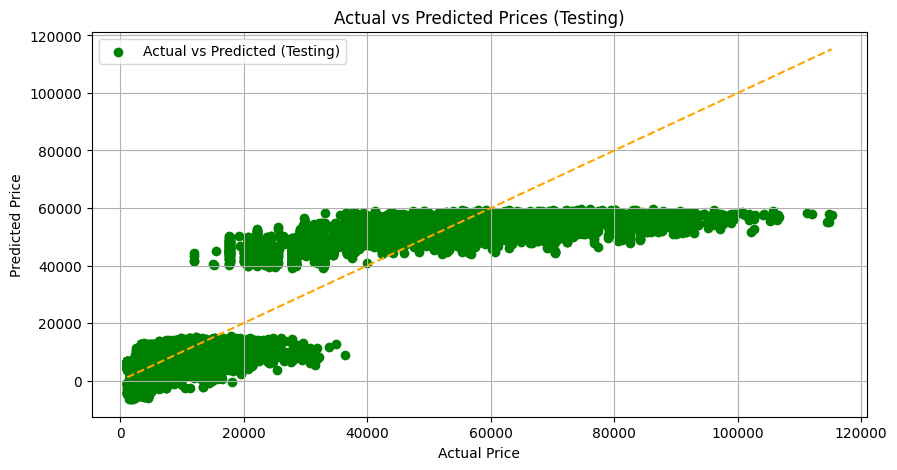

In [30]:
# Plot actual vs predicted prices for testing dataset
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Testing)')
plt.legend()
plt.grid(True)
plt.show()

The green line represents the predicted price and the orange line represents the actual price.

In [31]:
data.drop(columns=['airline'],inplace=True,axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_city       300153 non-null  int32  
 1   departure_time    300153 non-null  int32  
 2   stops             300153 non-null  int32  
 3   arrival_time      300153 non-null  int32  
 4   destination_city  300153 non-null  int32  
 5   class             300153 non-null  int32  
 6   duration          300153 non-null  float64
 7   days_left         300153 non-null  int64  
 8   price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(2)
memory usage: 13.7 MB


In [33]:
label_encoder = LabelEncoder()
categorical_cols = ['source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
X = data.drop(columns=['price'])
y = data['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
#Evaluate the model
train_score = linear_reg.score(X_train, y_train)
test_score = linear_reg.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

Training R^2 score: 0.8989406071508683
Testing R^2 score: 0.8988522951472384


Droping the 'airline' column effected the accuracy score .So, it's an important attribute.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   source_city       300153 non-null  int64  
 1   departure_time    300153 non-null  int64  
 2   stops             300153 non-null  int64  
 3   arrival_time      300153 non-null  int64  
 4   destination_city  300153 non-null  int64  
 5   class             300153 non-null  int64  
 6   duration          300153 non-null  float64
 7   days_left         300153 non-null  int64  
 8   price             300153 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 20.6 MB


In [37]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

In [38]:

X = data.drop(columns=['price'])
y = data['price']

In [39]:
# Identify numerical columns
numerical_cols = X.columns.tolist()

# Preprocessing pipeline for numerical features:
The preprocessing pipeline is constructed to standardize the numerical features before they are used in the model. Standardization is a common preprocessing step that scales the numerical features to have a mean of zero and a standard deviation of one.

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ])


In [41]:
# Polynomial features
poly = PolynomialFeatures(include_bias=False)

# Ridge regression model with pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('poly', poly),
    ('ridge', Ridge())
])

preprocessor:
Applies the preprocessor (a ColumnTransformer) to standardize the numerical features.
poly:
Transforms the standardized features into polynomial features using PolynomialFeatures.
ridge:
Fits a ridge regression model to the polynomial features.

In [42]:

# Parameter grid for hyperparameter tuning
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0],
    'poly__degree': [1, 2, 3]
}

In [43]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['source_city',
                                                                          'departure_time',
                                                                          'stops',
                                                                          'arrival_time',
                                                                          'destination_city',
                                                                          'class',
                                                                          'duration',
                                                                          'days_left'])])),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge())]),
             param_grid={'poly__degree': [1, 2, 3],
                         'ridge__alpha': [0.1, 1.0, 10.0]},
             scoring='r2')

In [44]:
# Best model evaluation
train_score = grid_search.score(X_train, y_train)
test_score = grid_search.score(X_test, y_test)

print("Best Training R^2 score:", train_score)
print("Best Testing R^2 score:", test_score)
print("Best Parameters:", grid_search.best_params_)

Best Training R^2 score: 0.9359523663313262
Best Testing R^2 score: 0.9348357465503997
Best Parameters: {'poly__degree': 3, 'ridge__alpha': 1.0}


These scores indicate that model captures approximately 93.5% of the variance in flight prices, demonstrating its strong predictive ability. The slight drop in performance from training to testing datasets suggests that the model generalizes well to unseen data.